In [48]:
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [49]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [50]:
def detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [51]:
def draw_landmarks(image, results):
     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [52]:
def style_of_landmarks(image, results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,50,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,50,10),thickness=1, circle_radius=1))
     # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw left connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw right connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
    
    

In [53]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [54]:
# define a video capture object
vid = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
    while(True):
        
        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        # make detection
        image, results = detection(frame, holistic)
        
        # draw landmarks
        style_of_landmarks(image, results)

        # Display the resulting frame
        cv2.imshow('frame', image)
        
        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [55]:
results

mediapipe.python.solution_base.SolutionOutputs

In [56]:
draw_landmarks(frame, results)

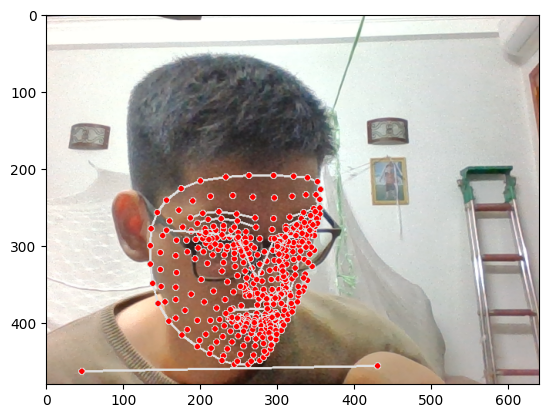

In [57]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))